In [1]:
import pandas as pd
import numpy as np 
from random import randint, random
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time
from synonym import tweet_scraper, get_synonym
from mots_scrapping import key_words 

In [2]:
depression = ["étudiants","université","enseignement","cours","études","cursus","stage","éducation","logement","étudier"]
etudiant = ["dépression","dépressif","tristesse","fatigue","décourager","crise","stress","pression","insomnie","chômage","souffre","souffrir","anxiété","anxieux",
           "isolement","solitude","abandonné","mental","pensée","abandon", "suicide","décès","mort","suicidaires", "consulter","psy","psychologique"]
maladie = ["coronavirus","confinement","Covid","covid-19","virus","pandémie","épidémie","clusters"]

In [3]:
results = []
for i in maladie:
    for j in depression:
        for k in etudiant:
            url_pattern = "https://twitter.com/search?q={}%20{}%20{}%20since%3A2020-03-16&src=typed_query".format(i,j,k)
            tmp = tweet_scraper(url_pattern)
            if tmp.shape[0] > 0 :
                results.append(tmp)

2020-03-26 

 Augmentation de l’anxiété et de la dépression: les principales préoccupations des étudiants dans un sondage sur les coronavirus https://drumpo.com/2020/03/26/augmentation-de-lanxiete-et-de-la-depression-les-principales-preoccupations-des-etudiants-dans-un-sondage-sur-les-coronavirus/… 

 #-----------------------------------------------#
2020-12-07 

 Je suis abasourdi par l'impact du coronavirus sur la santé mentale des étudiants de Sciences Po : 4 sur 10 sont en dépression, 6 sur 10 sont victimes d'anxiété. Les chiffres sont sans appel pour les cours en ligne. Sondage mené sur 1200 étudiants du 13 au 18 novembre. 

 #-----------------------------------------------#
2020-10-07 

 Vidéo TV7 –  Santé mentale et coronavirus : "Les étudiants ont des risques doubles de dépression, d’anxiété" 
https://sudouest.fr/2020/10/07/sante-mentale-et-coronavirus-les-etudiants-ont-des-risques-doubles-de-depression-d-anxiete-7933459-2780.php… 

 #-------------------------------------------

KeyboardInterrupt: 

In [7]:
import re

def clean_text(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text

In [5]:
data =pd.concat(results)

data["Comment"] = data["Comment"].apply(clean_text)

In [98]:
data.to_csv("./tweet_1421")

In [11]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
import string
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

/home/danpdvn/.local/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [12]:
data["Comment"]= data["Comment"].str.lower()



AComment=[]
for comment in data["Comment"].apply(str):
    Word_Tok = []
    for word in  re.sub("\W"," ",comment ).split():
        Word_Tok.append(word)
    AComment.append(Word_Tok)
data["Word_Tok"]= AComment

stop_words=set(STOP_WORDS)

deselect_stop_words = ['n\'', 'ne','pas','plus','personne','aucun','ni','aucune','rien']
for w in deselect_stop_words:
    if w in stop_words:
        stop_words.remove(w)
    else:
        continue
        
AllfilteredComment=[]
for comment in data["Word_Tok"]:
    filteredComment = [w for w in comment if not ((w in stop_words) or (len(w) == 1))]
    AllfilteredComment.append(' '.join(filteredComment))
data["CommentAferPreproc"]=AllfilteredComment

In [23]:
senti_list = []
for n, i in enumerate(data["CommentAferPreproc"]):
    vs = SIA.polarity_scores(i)
    senti_list.append( [data.date.iloc[n],vs['neg'], vs['neu'], vs['pos']])

In [30]:
df_final = pd.DataFrame(senti_list, columns=["date","très négatif", "négatif", "légèrement négatif" ])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8213adfd0>,
      dtype=object)

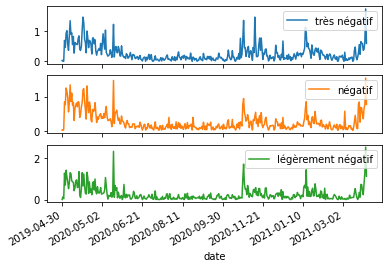

In [38]:
df_final.groupby('date').sum().apply(lambda x : round(x/x.sum()*100, 2)).plot(kind='line', subplots= True) 

In [80]:
import nltk
nltk.download('punkt')
tokens = nltk.tokenize.word_tokenize(data['CommentAferPreproc'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' '))
fd = nltk.FreqDist(tokens)
# fd.plot(30,cumulative=False)
k_w = pd.DataFrame([(m, n) for m, n in fd.items() if len(m) > 3]).sort_values(1, ascending = False)[:5][0].to_list()

[nltk_data] Downloading package punkt to /home/danpdvn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


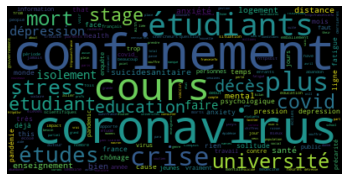

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 

filter_words = dict([(m, n) for m, n in fd.items() if len(m) > 3])
fw = [(m, n) for m, n in fd.items() if len(m) > 3]
wcloud = WordCloud().generate_from_frequencies(filter_words)
 
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

In [82]:
ts = []
for date, group in data.groupby("date"):
    tokens = nltk.tokenize.word_tokenize(group['CommentAferPreproc'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' '))
    fd = nltk.FreqDist(tokens)
    fw = [(m, n) for m, n in fd.items() if len(m) > 3]
    tmp = pd.DataFrame(fw)
    tmp = tmp[tmp[0].isin(k_w)]
    tmp["date"] = date
    ts.append(tmp)

In [84]:
df_ts = pd.concat(ts)
df_ts.columns = ["words", "count", "date"]
df_fin = df_ts.pivot_table(index='date', columns= "words", values="count")

In [87]:
df_fin.iloc[0,:] = df_fin.iloc[0,:].fillna(0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa820d147f0>,
      dtype=object)

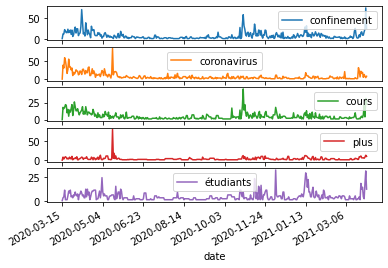

In [97]:
df_fin.fillna(method='ffill').plot(kind='line', subplots=True)